# Homework #1   Due date: 18 June 2022, 11:59 PM

## Q1) One feature regression for Boston data. 
Choose one of the features in Boston data, try to select one that is mostly correlated (or inversely correlated) with the target. Fit a line with linear Regression. What is the equation of the fitting line? Please plot your data points (chosen feature vs. target) and plot your fitting line on it.


## BOSTON dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [2]:
data = datasets.load_boston()

In [3]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

We are converting our dataset to pandas dataframe for easy analysis and Here we are considering MEDV as the target variable which is the Median value of owner-occupied homes in $1000's

In [4]:
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [5]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In order to select one that is mostly correlated (or inversely correlated) with the target we first use the correlation matrix which measures the linear relationship between the variables. we can also use the pairplots(or scatter plots) to check the linearity through the plots. 

<AxesSubplot:>

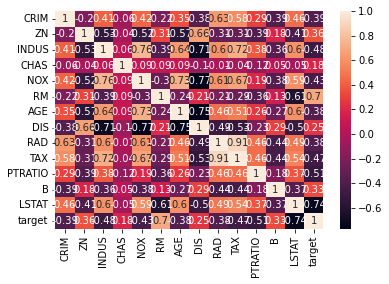

In [7]:
correlation_matrix = housing_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

From the matrix and plots we can see that RM has a strong positive correlation of 0.7 with the target variable where as LSTAT has a high negative correlation of -0.74 with the target variable. So inorder to fit a line with linear Regression I am considering the RM as the feature variable with MEDV as taget variable. From which we can predict prices of the houses based on number of rooms.

<AxesSubplot:xlabel='RM', ylabel='target'>

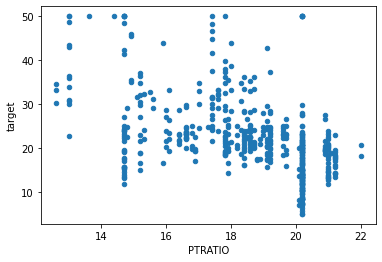

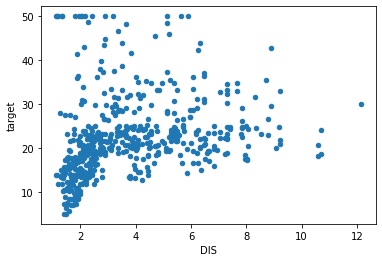

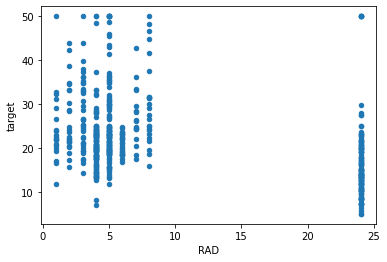

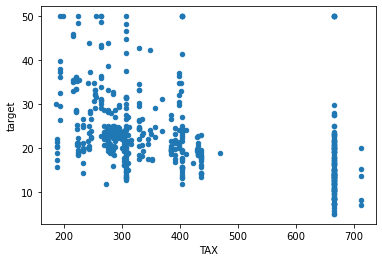

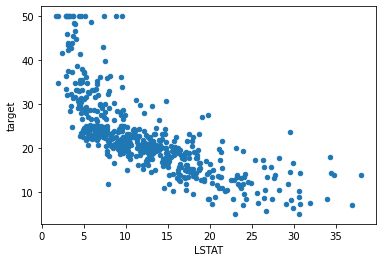

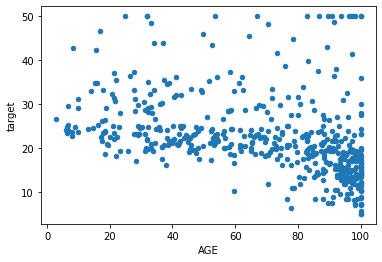

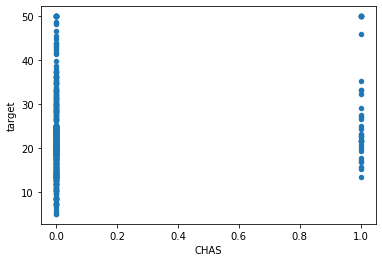

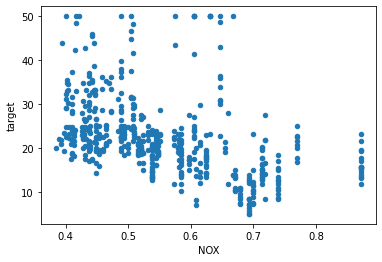

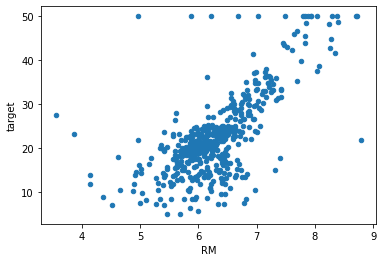

In [8]:
housing_df.plot.scatter(x='PTRATIO',y='target')   #pupil-teacher ratio by town
housing_df.plot.scatter(x='DIS',y='target')  #weighted distances to five Boston employment centres
housing_df.plot.scatter(x='RAD',y='target')  #index of accessibility to radial highways
housing_df.plot.scatter(x='TAX',y='target')  #full-value property-tax rate per $10,000
housing_df.plot.scatter(x='LSTAT',y='target')  #% lower status of the population
housing_df.plot.scatter(x='AGE',y='target')   #proportion of owner-occupied units built prior to 1940
housing_df.plot.scatter(x='CHAS',y='target')  #Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
housing_df.plot.scatter(x='NOX',y='target')  #nitric oxides concentration (parts per 10 million)
housing_df.plot.scatter(x='RM',y='target')  #average number of rooms per dwelling

In [9]:
RM = housing_df['RM'].values.reshape(-1, 1) 

target = housing_df['target'].values.reshape(-1, 1)
print(RM.shape)
print(target.shape)

(506, 1)
(506, 1)


Fitting a line with linear regression

In [10]:
lr = LinearRegression()
lr.fit(RM,target)


LinearRegression()

In [11]:
lr.coef_, lr.intercept_

(array([[9.10210898]]), array([-34.67062078]))

As we got an intercept and a coefficient we can plot a line using the line equation ($\theta_0$ - intercept, $\theta_1$ - coefficient of x). This representation with single feature variable is also called as univariate linear regression.

$h_{\theta}(x) = \theta_0 + \theta_1 x_1$

equation of the fitting line

y = lr.intercept_ + x*lr.coef_

plotting the fitting line with our data points (chosen feature as RM vs. target as MEDV) 

Text(0.5, 0, 'number of rooms')

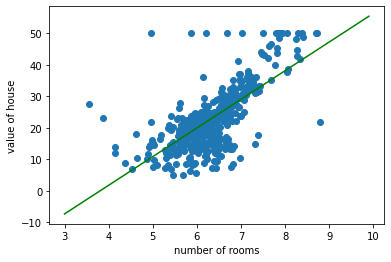

In [12]:
f = lambda x: lr.coef_[0] * x + lr.intercept_
steps = list(np.arange(3,10,.1))
fitline = list(map(f, steps))
pyplot.plot(steps, fitline, color='green')
pyplot.scatter(x=housing_df.RM,y=housing_df.target)
pyplot.ylabel('value of house')
pyplot.xlabel('number of rooms')

## Q2) Another metric for performance evaluation
We have seen that LinearRegression() by *sklearn* provides a method called *score* which outputs a value with a maximum of 1 (the larger the better), which is good to evaluate the performance. 
Another common performance metric is mean sum of squared error (MSSE):

$$\frac{1}{m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Please implement this metric and compute it when Boston data with all features are used. lr.score gave 0.74. What is the MSSE?

Important restriction: Do NOT use *mean_squared_error* module from *sklearn.metrics*.

In order to evaluate the performance of our model we try to train and then test our model by splitting the data into two parts.
Here in our model we are considering 30% of the datapoints for the testing and the remaining 70% for training our model.

In [13]:
from sklearn.model_selection import train_test_split
x=housing_df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y=housing_df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [14]:
lr.fit(x_train, y_train)

LinearRegression()

In [15]:
print(lr.coef_)

[-1.30877399e-01  3.79089578e-02  3.39680742e-02  3.36994474e+00
 -1.33591676e+01  4.28167293e+00  6.49999954e-03 -1.31996261e+00
  2.80065288e-01 -9.85683375e-03 -7.88487522e-01  1.20616682e-02
 -6.07133511e-01]


In [16]:
# For prediction datapoints on our test data
y_pred = lr.predict(x_test)
print(y_pred)

[30.5979969  34.25290514 15.70280578 13.52941518 12.88455673 -1.39805669
 29.91798409 26.60756258 24.99154549 13.99834997 24.5903379  41.03721708
 18.75444425 23.02496557 21.58201846 13.16371494 12.73342297 22.45654225
 20.58573793 34.03997624 21.12306271 23.11583062  5.15546116 18.7430145
 22.59483415 15.60277206 19.99087846 33.82263925 30.41427334 22.30197144
 14.07021765 27.21113285 41.63932593 21.07020273 29.51749625 17.80034556
 34.55617596 18.51253326 19.15629357 32.41166003 21.15492162 23.63277987
 35.44949193 16.34946998 18.20088709 13.61917249 21.62363205 20.07003331
 31.26999251 20.91708229 15.79640905 20.61217604  5.2714499  -1.59900641
 25.66075798 17.32139019 36.63537447 26.53942242 27.3957626  28.67941769
 29.86761067 19.14211499 18.71596441 21.36171776 24.28414369 41.0769777
 24.16902229 27.01064543 18.17181851 39.41875667  4.8499514  18.21558895
 20.21982752  3.90578801 22.33573062 16.51753161 20.71574039 16.30688526
 33.75979159 16.61246344 14.47983028  5.11425328 12.3

In [17]:
# For actual datapoints 
print(y_test)

175    29.4
182    37.9
127    16.2
134    15.6
383    12.3
       ... 
328    19.3
170    17.4
140    14.0
132    23.0
40     34.9
Name: target, Length: 152, dtype: float64


In [18]:
# after getting the predicted values and actual values we can evaluate the model performance by using the mean sum of squared error formula
# The output received is the MSSE
print(np.mean(np.sum((y_pred - y_test)**2))/len(y))

6.667136325932011
